# ML2: Advance Regression:
#  Surprise Housing 

## > Context : Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Loading required libs for further coding/use:

In [1]:
#Importing required libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### > Loading and basic Data Analysis: 

In [2]:
#Read the data from CSV and holding in the dataframe
housing_df = pd.read_csv("train.csv")

# Checking the loaded data, first look 
housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#chceking shape
housing_df.shape

(1460, 81)

In [4]:
#chek using info that will also display types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observation : No NULL columns

In [5]:
#Summary of the numerical columns using describe
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#seeing column names
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Calculate the total number of missing/Null values per column

#missing_values = null_columns
null_counts = housing_df.isnull().sum()
null_columns = null_counts[housing_df.isnull().sum() > 0]
# Calculate the percentage of missing values per column
missing_percentage = (null_columns / len(housing_df)) * 100

# Combine the counts and percentages into a new DataFrame for easier display
missing_info = pd.DataFrame({
    'Missing Values': null_columns,
    'Percentage': missing_percentage,
   
}).sort_values(by='Percentage',ascending = False)

# Display the missing values information
print("Missing Values Information:")
print(missing_info)
print(f"\nTotal number of columns containing null values: {len(null_columns)}")

Missing Values Information:
              Missing Values  Percentage
PoolQC                  1453   99.520548
MiscFeature             1406   96.301370
Alley                   1369   93.767123
Fence                   1179   80.753425
FireplaceQu              690   47.260274
LotFrontage              259   17.739726
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
BsmtExposure              38    2.602740
BsmtFinType2              38    2.602740
BsmtFinType1              37    2.534247
BsmtCond                  37    2.534247
BsmtQual                  37    2.534247
MasVnrArea                 8    0.547945
MasVnrType                 8    0.547945
Electrical                 1    0.068493

Total number of columns containing null values: 19


In [8]:
#Drop columns with maximum missing values
housing_df = housing_df.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley'])

In [9]:
# Calculate the number of unique values per column

housing_df.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            8
PoolArea            8
Functional          7
SaleCondition       6
GarageType          6
Heating             6
BsmtFinType1        6
BsmtFinType2        6
Foundation          6
RoofStyle 

In [10]:
# Looking at the 
# Specify the columns for which you want to print unique values
# Calculate the number of unique values per column
unique_values = housing_df.nunique()
selected_columns = unique_values[unique_values < 6].index
print(f"Number of columns with 5 or less unique values : {selected_columns.size}")
#selected_columns = ['Column1', 'Column2', 'Column3']  # Replace with your actual column names

# Print unique values for the specified columns
for column in selected_columns:
    unique_values = housing_df[column].unique()
    print(f"{column}: {unique_values}")
    print()

Number of columns with 5 or less unique values : 31
MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street: ['Pave' 'Grvl']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope: ['Gtl' 'Mod' 'Sev']

BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

ExterQual: ['Gd' 'TA' 'Ex' 'Fa']

ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']

BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']

BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']

BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]

HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']

CentralAir: ['Y' 'N']

Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

BsmtFullBath: [1 0 2 3]

BsmtHalfBath: [0 1 2]

FullBath: [2 1 3 0]

HalfBath: [1 0 2]

KitchenAbvGr: [1 2 3 0]

KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']

Fireplaces: [0 1 2 3]

FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

GarageFinish: ['RFn' 'Unf' 'Fin' nan]

GarageCars: [2

In [11]:
# Print the value counts for each selected column
for column in selected_columns:
    print(f"Value counts for column '{column}':")
    print(housing_df[column].value_counts())
    print("\n")

Value counts for column 'MSZoning':
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Value counts for column 'Street':
Pave    1454
Grvl       6
Name: Street, dtype: int64


Value counts for column 'LotShape':
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Value counts for column 'LandContour':
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Value counts for column 'Utilities':
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Value counts for column 'LotConfig':
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Value counts for column 'LandSlope':
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Value counts for column 'BldgType':
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


Value counts for column 'MasVnrType':

#### > Basic Data Handling/Preperation :Imputing Nan values with median mode or NA as required

In [12]:
#Replace Nan values of FireplaceQu with NA for No Fireplace 
housing_df.FireplaceQu = housing_df.FireplaceQu.fillna('NA')

In [13]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section

#computing median of LotFrontage
LotFrontage_median = housing_df.LotFrontage.median()
print(LotFrontage_median)

housing_df.LotFrontage = housing_df.LotFrontage.fillna(LotFrontage_median)

69.0


In [14]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing_df.MasVnrArea = housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.median())    

In [15]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
housing_df.MasVnrType = housing_df.MasVnrType.fillna('None')

In [16]:
#replace Nan values of BsmtQual with NA i.e. No Basement
housing_df.BsmtQual = housing_df.BsmtQual.fillna('NA')

In [17]:
#replace Nan values of BsmtCond with NA i.e. No Basement
housing_df.BsmtCond = housing_df.BsmtCond.fillna('NA')

#replace Nan values of BsmtExposure with No i.e. No Exposure
housing_df.BsmtExposure = housing_df.BsmtExposure.fillna('No')

#replace Nan values of BsmtFinType1 with NA i.e. No Basement
housing_df.BsmtFinType1 = housing_df.BsmtFinType1.fillna('NA')

#replace Nan values of BsmtFinType2 with NA i.e. No Basement
housing_df.BsmtFinType2 = housing_df.BsmtFinType2.fillna('NA')

#impute missing values of Electrical with mode due to categorical column
housing_df.Electrical = housing_df.Electrical.fillna(housing_df.Electrical.mode()[0])    

#replace Nan values of GarageType with NA i.e. No Garage
housing_df.GarageType = housing_df.GarageType.fillna('NA')

#replace Nan values of GarageYrBlt with 0 i.e. No Garage
housing_df.GarageYrBlt = housing_df.GarageYrBlt.fillna(0)

#replace Nan values of GarageFinish with NA i.e. No Garage
housing_df.GarageFinish = housing_df.GarageFinish.fillna('NA')

#replace Nan values of GarageQual with NA i.e. No Garage
housing_df.GarageQual = housing_df.GarageQual.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
housing_df.GarageCond = housing_df.GarageCond.fillna('NA')

In [18]:
#check missing values again in case 
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

Series([], dtype: int64)

####  Creating derived meaningful column HouseAge

In [19]:
#Creating derived meaningful column HouseAge
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 

housing_df['HouseAge'] = housing_df.YrSold - housing_df.YearBuilt

#Drop YrSold, YearBuilt after HouseAge
housing_df=housing_df.drop(columns=['YrSold', 'YearBuilt'])

##### Convering types /mapping to meaningful values 

In [20]:
#convert MSSubClass into object type as this should not be treated as numbers
convert_dict = {'MSSubClass':object}
housing_df = housing_df.astype(convert_dict)

In [21]:
#Looking into object type columns
for c in housing_df.columns:
    if housing_df[c].dtype == object:
        print(c)
        print(housing_df[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [22]:
#Get all object type columns
object_columns = []
for c in housing_df.columns:
    if housing_df[c].dtype == object:
        object_columns.append(c)
print(object_columns)
print(object_columns.count)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
<built-in method count of list object at 0x146192740>


#### 

In [23]:
housing_df.shape

(1460, 76)

In [24]:
# #check the correaltion with new columns with heatmap
#plt.figure(figsize=(100,85))
#sns.heatmap(housing_df.corr(), annot =True, cmap="YlGnBu")
#plt.show()

#### > EDA

#### Uni and Bi Varaite Analysis

Text(0, 0.5, 'SalePrice')

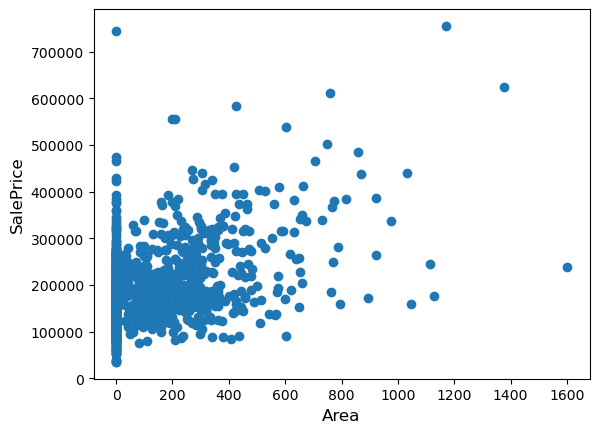

In [25]:
plt.scatter(housing_df.MasVnrArea,housing_df.SalePrice)
plt.xlabel('Area', fontsize=12)            # X-label
plt.ylabel('SalePrice', fontsize=12) 

Text(0.5, 1.0, 'Veneer Area')

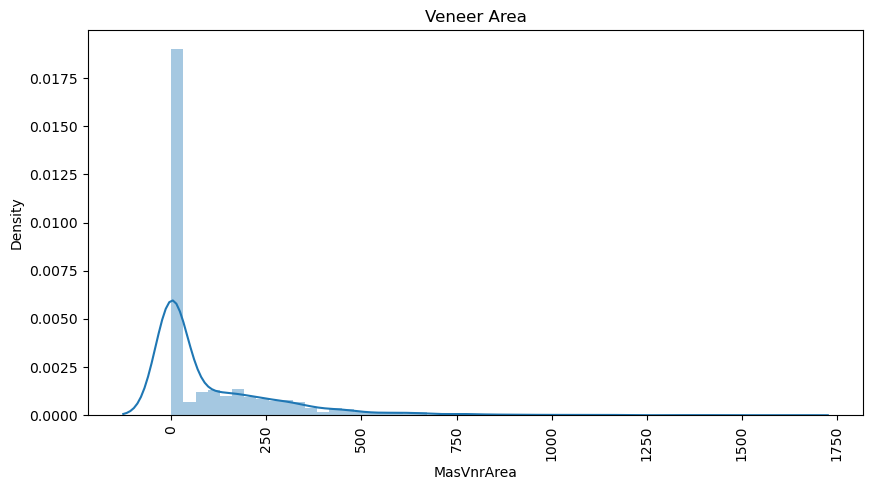

In [26]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(housing_df['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

Skewness: 1.882876
Kurtosis: 6.536282


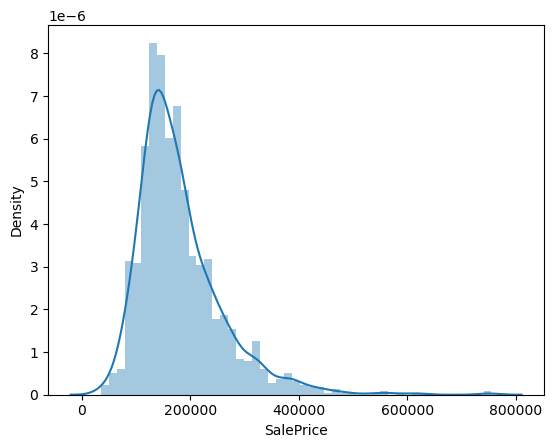

In [27]:
sns.distplot(housing_df['SalePrice'])
print("Skewness: %f" % housing_df['SalePrice'].skew())
print("Kurtosis: %f" % housing_df['SalePrice'].kurt())

In [28]:
## Checking Basement counts
#sns.countplot(x='BsmtCond', data= housing_df)
#plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

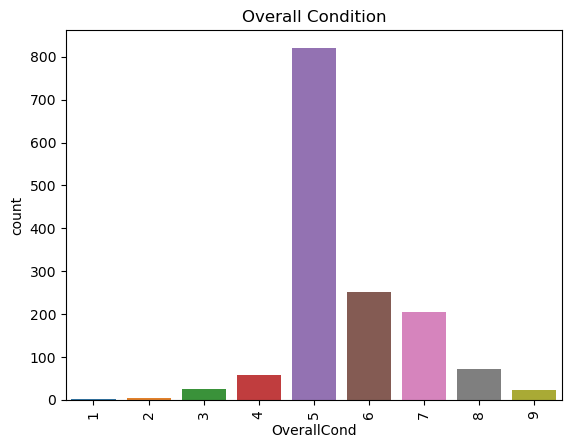

In [29]:
#plotting overall condition
sns.countplot(x='OverallCond', data= housing_df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

# 5 is most overall condition

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

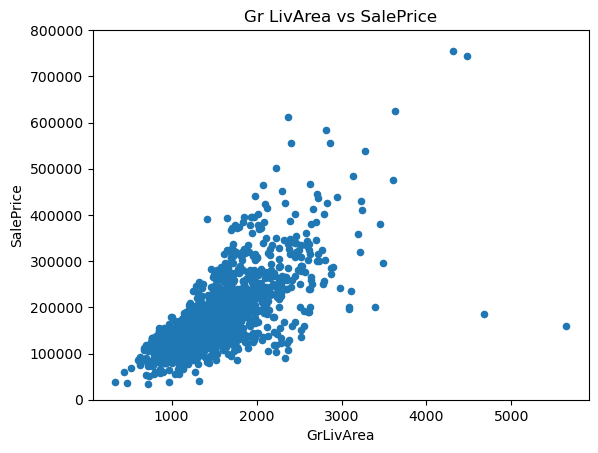

In [30]:
data = pd.concat([housing_df['SalePrice'], housing_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

observation : Price looks fairly proportional to Living Area

<Axes: xlabel='SalePrice'>

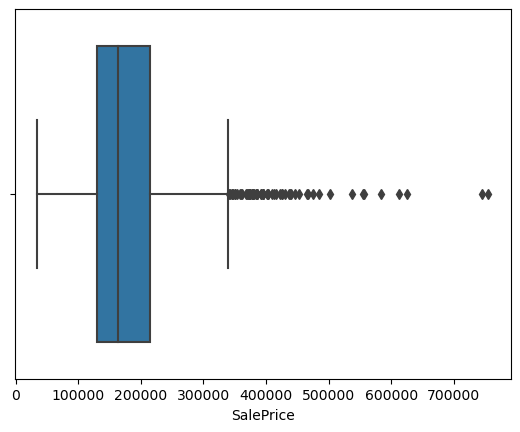

In [31]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=housing_df)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

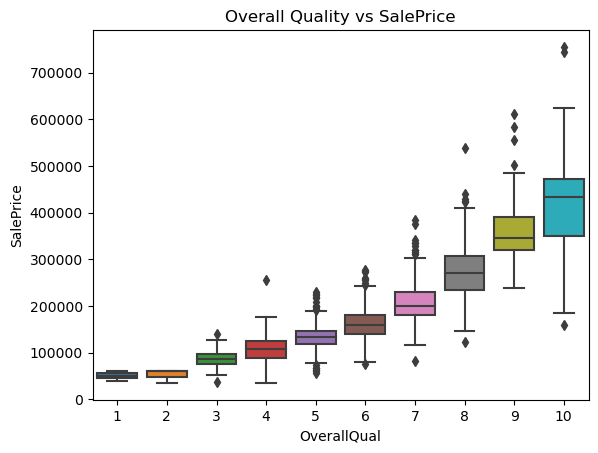

In [32]:
# Checking Quality vs Sale Price 
sns.boxplot(x='OverallQual', y='SalePrice', data=housing_df)
plt.title("Overall Quality vs SalePrice")

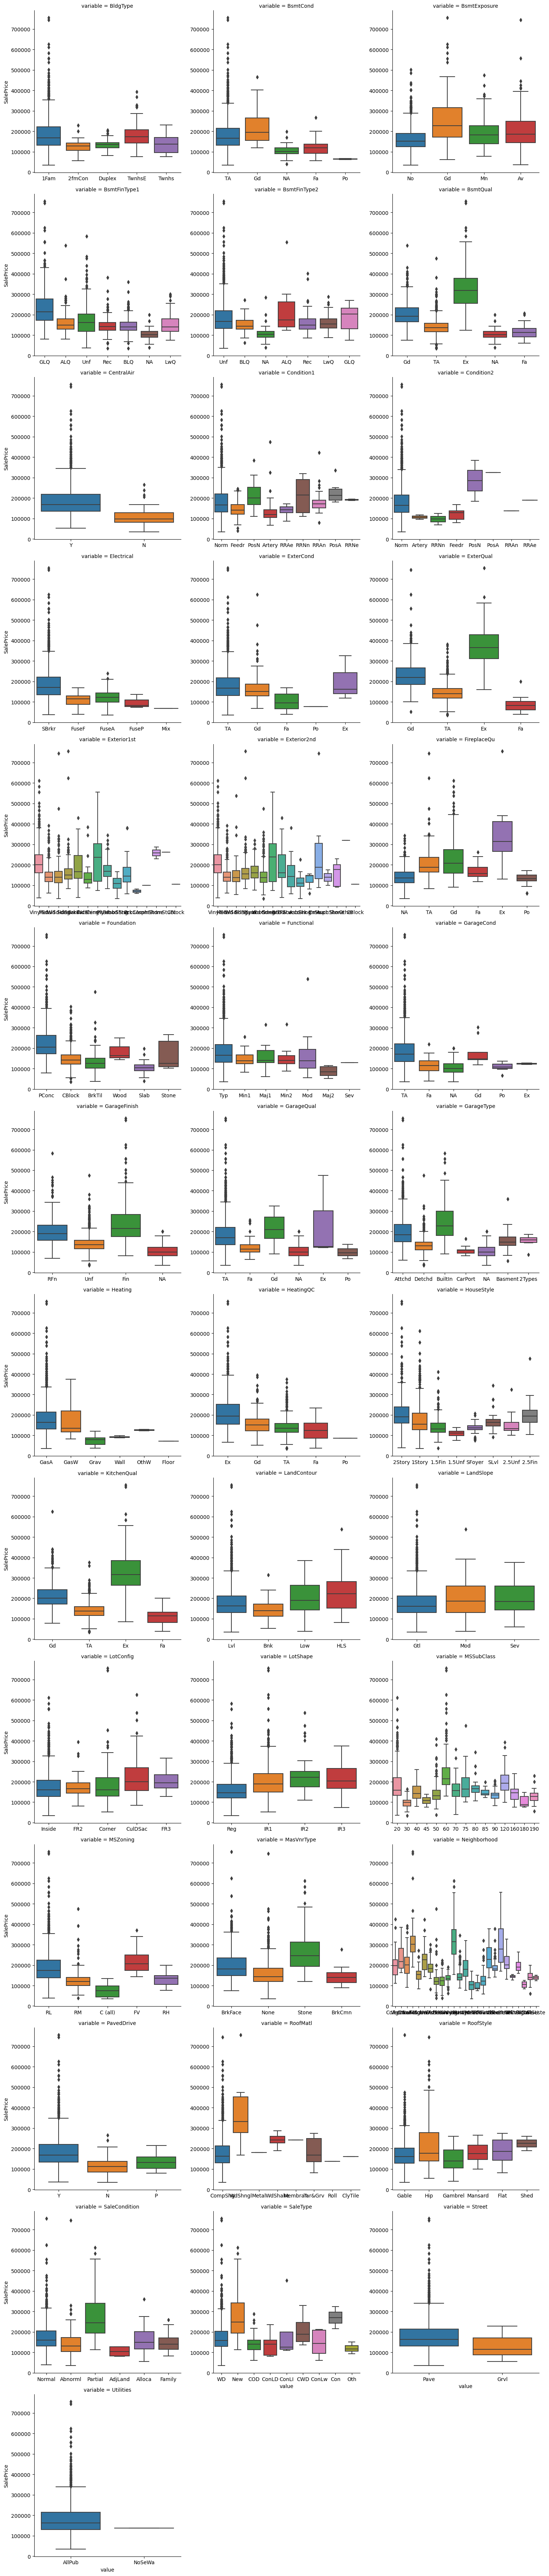

In [33]:
# Plotting Categorical Features with Sale Price
# Define the boxplot function
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)

# Selecting categorical columns
categorical = housing_df.select_dtypes(exclude=['int64', 'float64'])

# Melt the DataFrame
f = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=sorted(housing_df[categorical.columns]))

# Create a FacetGrid
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

# Show the plot
plt.show()

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile. From the above boxes plots we see that:-

Paved alleys properties demand a higher price.
Houses where the basement quality is good and excellent are sold at higher prices compared to others.
Houses with good and excelent garages are sold at higher prices.
Houses with good quality kitchens also impact the price in a postive way.


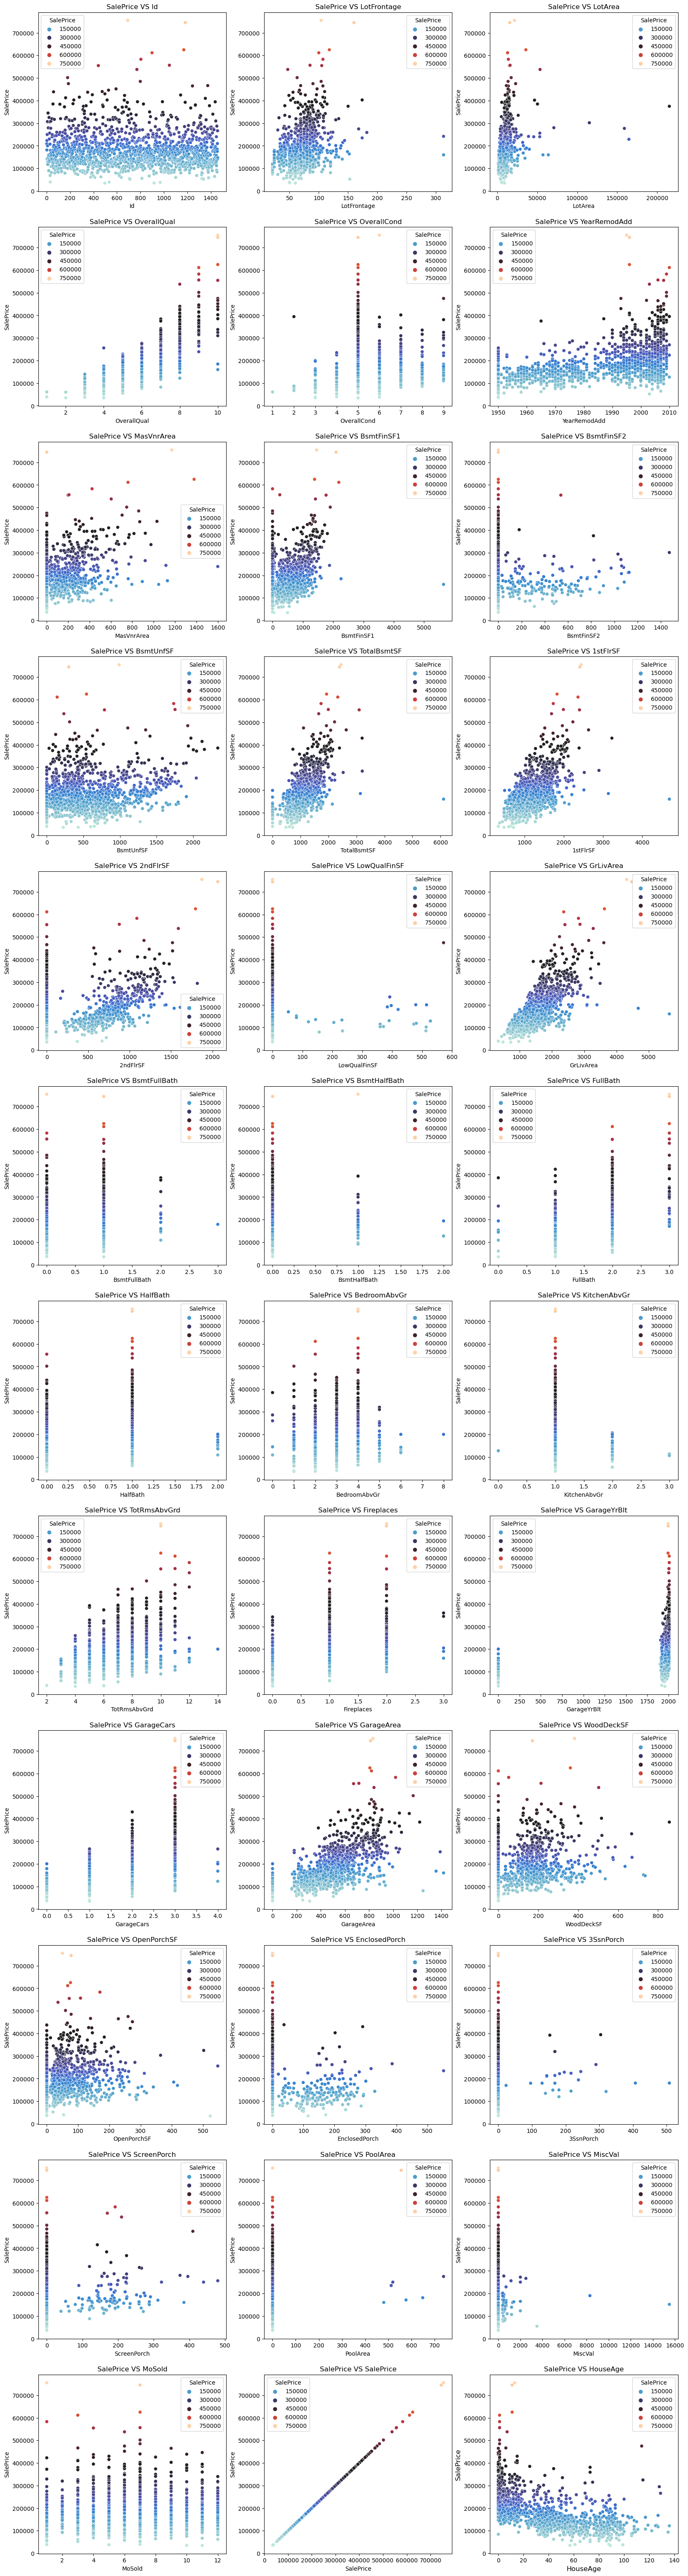

In [34]:
#scatterplot
#sns.set()
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'HouseAge'] # use derived column HouseAge
#sns.pairplot(housing_df[cols], size = 2.5)
#plt.show();



#Visualising numerical predictor variables with Target Variables
df_num = housing_df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

Observations from the above plot:-

New properties are costlier than older properties.
GRLiving Area has a direct corelation with the proce of the property.
Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.

Text(0.5, 1.0, 'Checking Correlation matrix ')

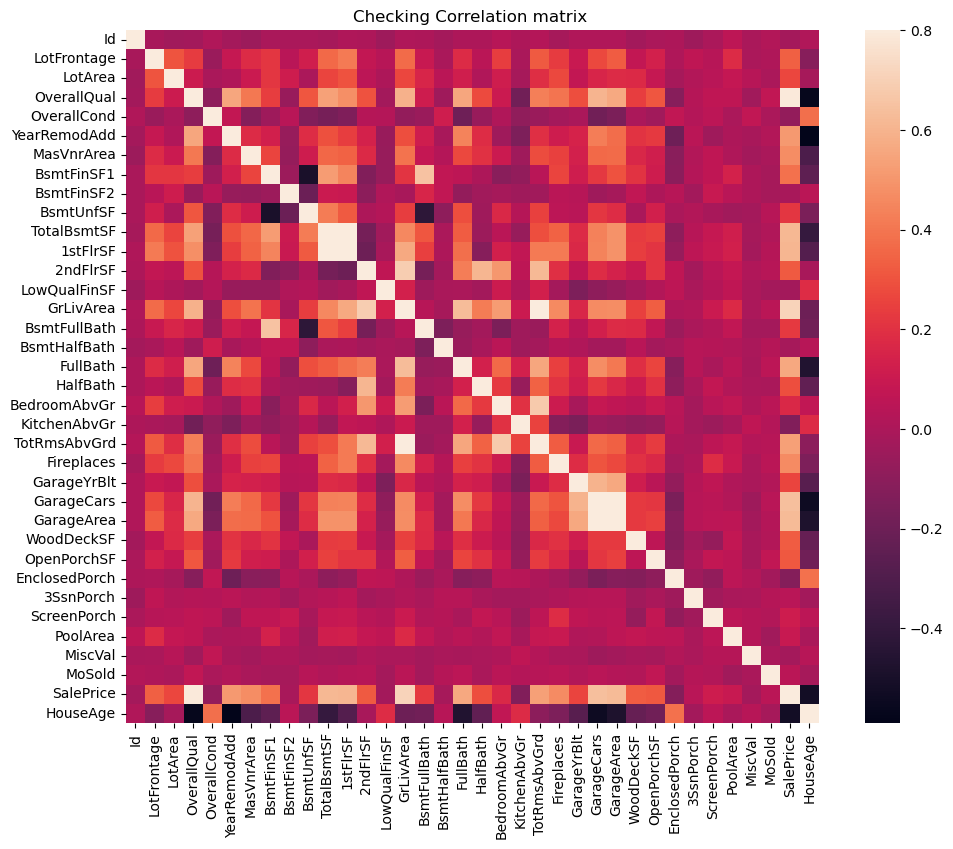

In [35]:
#checking the correlation matrix
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

### > Data Preperation

In [36]:
numeric_data = housing_df.select_dtypes(include = ['float64','int64'])
numeric_data.columns,len(numeric_data.columns)

(Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'SalePrice', 'HouseAge'],
       dtype='object'),
 36)

In [37]:
#Converting a Binary varible into numeric equivalent datatypes

housing_df['Street'] = housing_df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

housing_df['CentralAir'] = housing_df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
housing_df['PavedDrive'] = housing_df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [38]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these. Other outliers will be handled 
# during power transform
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(housing_df)
df.shape



(1455, 76)

In [39]:
# Looking for Categorical Variables ,Object types
cat_values = housing_df.select_dtypes(include=['object'])

cat_values.head()

,MSSubClass,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,60,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,WD,Normal
1,20,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,WD,Normal
2,60,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD,Normal
3,70,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,WD,Abnorml
4,60,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD,Normal


In [40]:
cat_values.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# Converting Categorical variables into dummies

housing_dummies = pd.get_dummies(cat_values, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
## Some Data cleaning :

# Droping the 'Id' column as it is irrelavant for analysis 

housing_df = housing_df.drop(columns=['Id'])

# Droping the original categorical column as we have dummies already
housing_df = housing_df.drop(list(cat_values.columns), axis=1)


# Adding the dummy categorical column to original dataset
housing_df = pd.concat([housing_df,housing_dummies], axis=1)
housing_df.shape

(1460, 257)

#### Split for Train and Test :

In [43]:
df_train,df_test = train_test_split(housing_df, train_size=0.7,test_size = 0.3, random_state=100)
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [44]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'HouseAge'],
      dtype='object')

In [45]:
#  Scaling the data using Standard Scalar
scaler = StandardScaler()

X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

### > Model Building :

#### Building Regression Model with

#### RFE

In [46]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)



LinearRegression()

In [47]:
# Calculating the RFE
# Create the RFE model and select 20 features
rfe = RFE(estimator=reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [48]:
#cheking which were selected 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 153),
 ('LotArea', False, 99),
 ('Street', False, 193),
 ('OverallQual', False, 32),
 ('OverallCond', False, 71),
 ('YearRemodAdd', False, 105),
 ('MasVnrArea', False, 223),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 158),
 ('1stFlrSF', False, 8),
 ('2ndFlrSF', False, 6),
 ('LowQualFinSF', False, 26),
 ('GrLivArea', False, 23),
 ('BsmtFullBath', False, 148),
 ('BsmtHalfBath', False, 231),
 ('FullBath', False, 181),
 ('HalfBath', False, 229),
 ('BedroomAbvGr', False, 195),
 ('KitchenAbvGr', False, 140),
 ('TotRmsAbvGrd', False, 219),
 ('Fireplaces', False, 236),
 ('GarageYrBlt', False, 137),
 ('GarageCars', False, 234),
 ('GarageArea', False, 74),
 ('PavedDrive', False, 218),
 ('WoodDeckSF', False, 176),
 ('OpenPorchSF', False, 202),
 ('EnclosedPorch', False, 198),
 ('3SsnPorch', False, 210),
 ('ScreenPorch', False, 178),
 ('PoolArea', False, 205),
 ('MiscVal', False, 226),
 ('MoS

In [49]:
col=X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'Functional_Sev'],
      dtype='object')

In [50]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     59.74
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.29e-144
Time:                        23:16:24   Log-Likelihood:                -131.97
No. Observations:                1021   AIC:                             301.9
Df Residuals:                    1002   BIC:                             395.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.1395      0.321     25.332      0.000       7.509       8.770
BsmtFinSF1           9.131e+11   1.09e+12      0.840      0.401   -1.22e+12    3.05e+12
BsmtFinSF2           3.355e+11      4e+11      0.840      0.401   -4.49e+11    1.12e+12
BsmtUnfSF            8.811e+11   1.05e+12      0.840      0.401   -1.18e+12    2.94e+12
TotalBsmtSF         -9.017e+11   1.07e+12     -0.840      0.401   -3.01e+12    1.21e+12
MSZoning_FV             1.0075      0.113      8.910      0.000       0.786       1.229
MSZoning_RH             0.6427      0.130      4.932      0.000       0.387       0.898
MSZoning_RL             0.7826      0.106      7.395      0.000       0.575       0.990
MSZoning_RM             0.5853      0.107      5.447      0.000       0.374       0.796
Condition2_PosN        -1.1629      0.282     -4.120      0.000      -1.717      -0.609
RoofMatl_CompShg        3.1298      0.306     10.234      0.000       2.530       3.730
RoofMatl_Membran        3.4624      0.417      8.301      0.000       2.644       4.281
RoofMatl_Metal          3.1990      0.412      7.759      0.000       2.390       4.008
RoofMatl_Roll           2.9868      0.415      7.199      0.000       2.173       3.801
RoofMatl_Tar&Grv        3.2770      0.333      9.855      0.000       2.624       3.929
RoofMatl_WdShake        3.4477      0.335     10.282      0.000       2.790       4.106
RoofMatl_WdShngl        3.4031      0.330     10.314      0.000       2.756       4.051
Exterior1st_BrkComm    -0.7172      0.208     -3.453      0.001      -1.125      -0.310
Exterior1st_CBlock  -4.958e+07    5.9e+07     -0.840      0.401   -1.65e+08    6.63e+07
Exterior2nd_CBlock   4.958e+07    5.9e+07      0.840      0.401   -6.63e+07    1.65e+08
Functional_Sev         -0.2951      0.309     -0.956      0.339      -0.901       0.311
==============================================================================
Omnibus:                        3.777   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.853
Skew:                           0.093   Prob(JB):                        0.146
Kurtosis:                       3.236   Cond. No.                     9.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
#X_train_new = X_train_rfe.drop(["weekday_5","weekday_3","weekday_4","weekday_1","weekday_2","workingday" ], axis = 1)

#### Ridge Regression :

In [52]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
#checking which alpha value gives best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.0892275982416267


So 'alpha': 20 gives best score

In [54]:
# the Results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.029205,0.021361,0.003152,0.000754,0.0001,{'alpha': 0.0001},-0.090795,-0.094390,-0.098140,-0.097641,...,-0.093058,0.005100,19,-0.053100,-0.054333,-0.054150,-0.055724,-0.054323,-0.054326,0.000835
1,0.009121,0.000925,0.003613,0.001561,0.001,{'alpha': 0.001},-0.090612,-0.094394,-0.097913,-0.097133,...,-0.092858,0.005011,17,-0.053153,-0.054339,-0.054169,-0.055772,-0.054403,-0.054367,0.000835
2,0.008992,0.001646,0.002551,0.000457,0.01,{'alpha': 0.01},-0.089910,-0.094421,-0.096684,-0.093172,...,-0.091746,0.004215,12,-0.054201,-0.054416,-0.055084,-0.056552,-0.055634,-0.055177,0.000853
3,0.010459,0.003500,0.002976,0.001185,0.05,{'alpha': 0.05},-0.091708,-0.094413,-0.097900,-0.088167,...,-0.092106,0.003707,14,-0.058305,-0.054731,-0.058787,-0.060432,-0.060054,-0.058462,0.002023
4,0.024232,0.009028,0.003749,0.000938,0.1,{'alpha': 0.1},-0.093456,-0.094312,-0.099254,-0.087512,...,-0.093094,0.003883,20,-0.060864,-0.055113,-0.061144,-0.063261,-0.062923,-0.060661,0.002930
5,0.018183,0.003096,0.006506,0.002722,0.2,{'alpha': 0.2},-0.095308,-0.094173,-0.100033,-0.086332,...,-0.093795,0.004416,25,-0.063223,-0.055821,-0.063247,-0.066007,-0.065553,-0.062770,0.003659
6,0.031554,0.026836,0.005778,0.000947,0.3,{'alpha': 0.3},-0.096000,-0.094355,-0.100149,-0.084955,...,-0.093845,0.004974,26,-0.064467,-0.056457,-0.064238,-0.067476,-0.066934,-0.063915,0.003945
7,0.015225,0.003031,0.003229,0.001433,0.4,{'alpha': 0.4},-0.096211,-0.094469,-0.100085,-0.083780,...,-0.093691,0.005406,24,-0.065335,-0.057048,-0.064858,-0.068453,-0.067855,-0.064710,0.004075
8,0.008255,0.001253,0.002684,0.000448,0.5,{'alpha': 0.5},-0.096219,-0.094526,-0.099958,-0.083039,...,-0.093534,0.005652,23,-0.066030,-0.057557,-0.065274,-0.069201,-0.068535,-0.065319,0.004151
9,0.075302,0.035707,0.004716,0.002315,0.6,{'alpha': 0.6},-0.096126,-0.094533,-0.099830,-0.082468,...,-0.093364,0.005827,22,-0.066602,-0.057998,-0.065584,-0.069772,-0.069068,-0.065805,0.004196


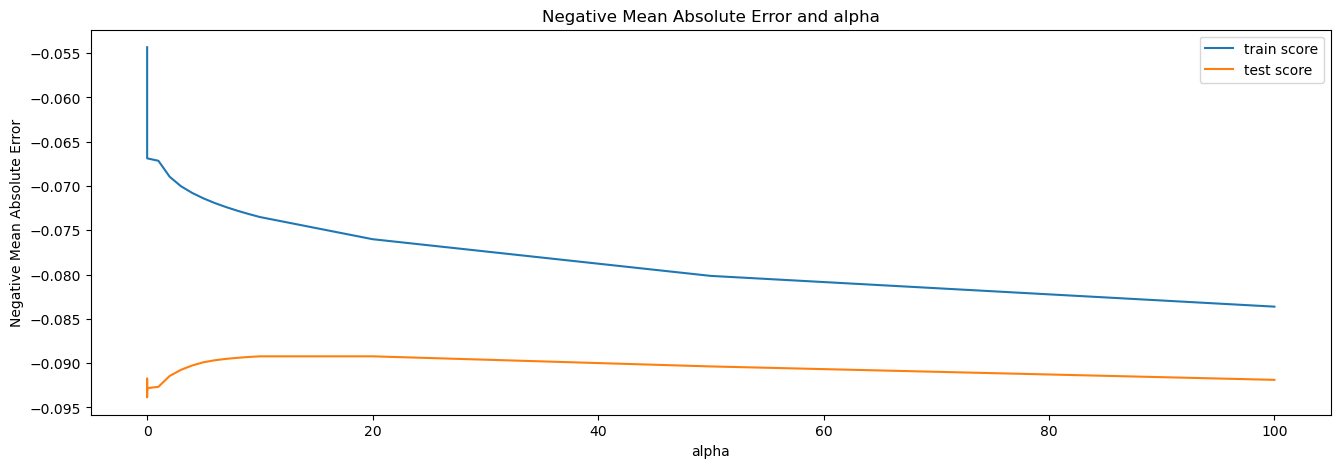

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
#final ridge model with coef
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00669017,  0.01994526,  0.01009781,  0.07924109,  0.04020323,
        0.02166336,  0.00126201, -0.00017129,  0.00775   ,  0.00490636,
        0.00750484,  0.01579438,  0.03413261,  0.03973491,  0.00134562,
        0.05816831,  0.02816989,  0.00274321,  0.02257806,  0.0146474 ,
        0.01000704, -0.0191174 ,  0.01724712,  0.00744699, -0.00133817,
        0.04180068,  0.00694368,  0.0022189 ,  0.01261531, -0.00138188,
        0.00851951,  0.00746322,  0.01049484, -0.01621187, -0.00149861,
       -0.00076759, -0.04131949, -0.05748238, -0.00309348, -0.00159233,
        0.01266469, -0.02837145,  0.0365458 ,  0.02129016, -0.00576938,
        0.00723778,  0.01090556, -0.01493215, -0.05034921, -0.01729434,
       -0.00466394,  0.0379257 ,  0.0222355 ,  0.0445861 , -0.01246503,
        0.01948876, -0.03318757,  0.00055984,  0.02509216,  0.02395063,
        0.03381784, -0.00688169,  0.02941582, -0.02739183, -0.00596381,
       -0.00858338,  0.02584719,  0.0005617 , -0.00223335, -0.01

In [57]:
# Predicting the R-squared value 

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9167125610310837


In [58]:
# Predictinng on test set

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8879704427284993


In [59]:
# Checking the RMSE value

mean_squared_error(y_test, y_test_pred)

0.018433356408034104

#### Lasso Regression:

In [60]:

#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [62]:
#checking which alpha value gives best score
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08665222154035182


In [63]:
#final lasso model

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [64]:
#Predict the R-squared value for train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9480495543625124


In [65]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.876858568114306


In [66]:
# RMSE 
mean_squared_error(y_test, y_test_pred)

0.020261705551898115

In [67]:
lasso.coef_

array([-2.93024392e-03,  2.05180011e-02,  4.98416135e-03,  6.03613615e-02,
        3.69459400e-02,  2.39228024e-02,  1.19487974e-03,  6.55383250e-03,
        5.12809722e-03, -0.00000000e+00,  1.76821876e-02,  1.58041827e-02,
        7.37820881e-02,  8.02294523e-02,  5.02856341e-03,  3.50970349e-02,
        2.01055202e-02,  1.22688535e-03,  1.54250564e-02,  9.26165706e-03,
        5.42551956e-03, -1.65136153e-02,  3.32726280e-03, -3.20689223e-03,
        7.44815674e-04,  3.66430631e-02,  4.09046121e-03,  1.84322382e-03,
        9.58195152e-03,  5.25107466e-03,  7.00748746e-03,  6.01500793e-03,
        8.36645218e-03, -9.46514407e-03, -1.81003398e-03, -4.59692301e-04,
       -4.93624200e-02, -8.86455402e-02, -2.03428071e-02, -3.10349778e-03,
        8.33902910e-03, -4.22959897e-02,  2.37755794e-02,  1.46949158e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.61839178e-02,
       -1.11334903e-01, -4.94479488e-02, -3.98098438e-02,  3.48009095e-01,
        3.44949461e-01,  

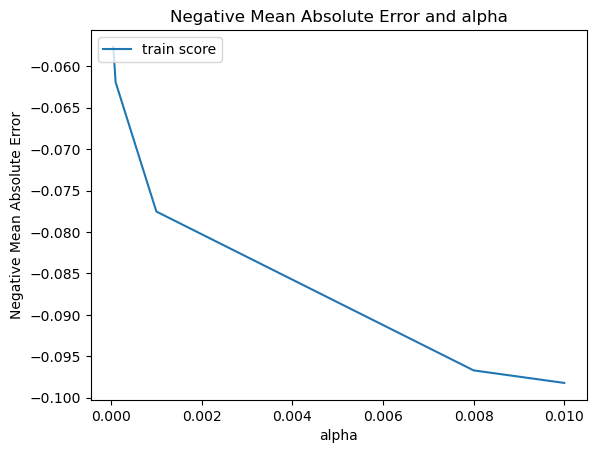

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
model_cv.best_params_

{'alpha': 20}

#### Looking for best values for Ridge and Lasso

In [70]:
# For Ridge
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9167125610310837
0.8879704427284993


In [71]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [72]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,11.838699
4,OverallCond,0.079241
74,Neighborhood_Crawfor,0.069272
84,Neighborhood_NridgHt,0.062774
16,BsmtFullBath,0.058168
89,Neighborhood_Somerst,0.056289
94,Condition1_Norm,0.051938
54,MSZoning_RL,0.044586
183,BsmtExposure_Gd,0.042500
133,Exterior1st_BrkFace,0.042111


In [73]:
#For Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9088060355428663
0.8840774918446787


In [74]:
model_param = list(lasso.coef_)
#model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
#cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']
#selecting the top 5 variables
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef,mod
15,RoofMatl_WdShake,0.111950,0.111950
3,BsmtUnfSF,0.089844,0.089844
4,TotalBsmtSF,0.042127,0.042127
16,RoofMatl_WdShngl,0.030827,0.030827
5,MSZoning_FV,0.020671,0.020671
18,Exterior1st_CBlock,0.019541,0.019541
1,BsmtFinSF1,0.018694,0.018694
11,RoofMatl_Membran,0.014117,0.014117
10,RoofMatl_CompShg,0.013991,0.013991
19,Exterior2nd_CBlock,0.013699,0.013699


Inference:

Best alpha value for Lasso : {'alpha': 20}

Best alpha value for Ridge : {'alpha': 0.001}

#### After compairing both the model we can see that the below Features are the variavles from Lasso to keep model as show good performance and are close.



- RoofMatl_WdShake	
- BsmtUnfSF
- TotalBsmtSF	
- RoofMatl_WdShngl
- MSZoning_FV	
- Exterior1st_CBlock
- BsmtFinSF1
- RoofMatl_Membran
- RoofMatl_CompShg
- Exterior2nd_CBlock



